In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Fetching Dataset(Red Wine) from folder
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

In [3]:
#Fetching Dataset(White Wine) from folder
white_wine = pd.read_csv('winequality-white.csv', sep=';')

In [4]:
#assessing the data of red wine
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#assessing the data of white wine
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [8]:
#Describing Red Wine data
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
#Describing White Wine data
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [10]:
#Creating color array for red dataframe
red_wine['color'] = 'red'
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [11]:
#Creating color array for white dataframe
white_wine['color'] = 'white'
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [12]:
# Append dataframes
df1 = red_wine.append(white_wine)
wine_df = df1
# view dataframe to check for success
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [13]:
#Saving the combined data set to winequality_edited.csv
wine_df.to_csv('winequality_edited.csv', index = False)

In [14]:
wine_df = pd.read_csv('winequality_edited.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [15]:
#Grouping into Low, Medium and High Quality wines
bins = [1, 5.5, 7.5, 10]
group = ['Low', 'Medium', 'High']
wine_df['quality_label'] = pd.cut(wine_df['quality'], bins = bins, labels = group)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,Low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,Low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,Medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Low


In [16]:
#Question: Based on histograms of columns in the newly combined dataset, which of the following feature variables appear skewed to the right? Fixed Acidity, Total Sulfur Dioxide, pH, Alcohol?
#Answer: Fixed acidity and Alcohol. Please see below for explanation.

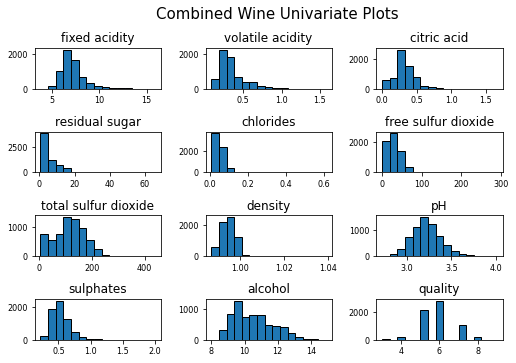

In [17]:
wine_df.hist(bins=15, edgecolor='black', linewidth=1.0,
xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
rt = plt.suptitle('Combined Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

In [18]:
#Question: Based on scatterplots of quality against different feature variables, which of the following is most likely to have a positive impact on quality? Volatile Acidity, Residual Sugar, pH, Alcohol?
#Answer: Alcohol. Please see below for explanation.

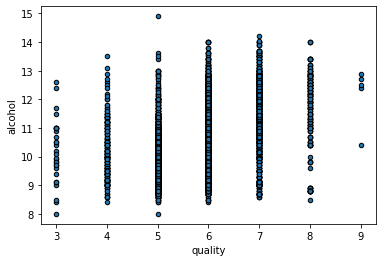

In [19]:
wine_df.plot(x = 'quality', y='alcohol', kind = 'scatter', edgecolor='black');

In [20]:
#Question: Is a certain type of wine (red or white) associated with higher quality?
#Answer: The mean quality of red wine is less than that of white wine. Please see below for explanation.

In [21]:
wine_df.groupby(['color'])['quality'].mean()

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

In [22]:
#Question: What level of acidity (pH value) receives the highest average rating?
#Answer:High: Lowest 25% of pH values
            # Moderately High: 25% - 50% of pH values
            # Medium: 50% - 75% of pH values
            # Low: 75% - max pH value
#'Low level' of acidity recieves highest average rating

In [23]:
# Viewing the min, 25%, 50%, 75%, max pH values with Pandas describe
wine_df.describe()['pH']

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [24]:
#Binning
#Bin edges that will be used to "cut" the data into groups
bin_edges = [2.72,3.11,3.21 ,3.32, 4.01]

In [25]:
#Labels for the four acidity level groups
bin_names = ['Highest' ,'High' ,'Medium', 'Low' ]

In [26]:
# Creates acidity_levels column
wine_df['acidity_levels'] = pd.cut(wine_df['pH'], bin_edges, labels=bin_names)
# Checks for successful creation of this column
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,quality_label,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Low,Low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,Low,High
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,Low,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,Medium,High
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Low,Low


In [27]:
# Find the mean quality of each acidity level with groupby
wine_df.groupby(['quality'])['acidity_levels'].describe()

,count,unique,top,freq
quality,,,,
3,30,4,Low,11
4,216,4,Highest,66
5,2138,4,High,609
6,2835,4,Highest,760
7,1079,4,Low,293
8,193,4,Low,52
9,5,3,Low,2


In [28]:
#Question: Do wines with higher alcoholic content receive better ratings?
#Answer: Yes, Wines with higher alcoholic content generally receive better ratings.red_wine

In [29]:
# getting the median amount of alcohol content
median = wine_df['alcohol'].median()

# selecting samples with alcohol content less than the median
low_alcohol = wine_df.query('alcohol < {}'.format(median))
# selecting samples with alcohol content greater than or equal to the median
high_alcohol = wine_df.query('alcohol >= {}'.format(median))

# getting mean quality rating for the low alcohol and high alcohol groups
mean_quality_low = low_alcohol['quality'].mean()
mean_quality_high = high_alcohol['quality'].mean()

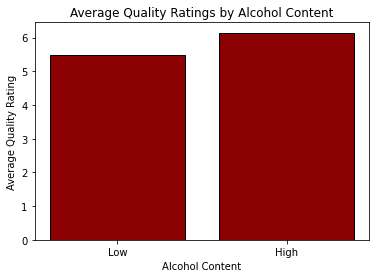

In [30]:
# Creating a bar chart 
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels, color='darkred', edgecolor='black')
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

In [31]:
#Renaming column names for simplicity.
wine_df.rename(columns={'fixed acidity': 'fixed_acidity', 'volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid', 'residual sugar': 'residual_sugar', 'free sulphur dioxide': 'free_sulphur_dioxide', 'total sulphur dioxide': 'total_sulphur_dioxide'}, inplace=True)

In [32]:
#Question: Do sweeter wines generally receive higher ratings?
#Answer: Yes, sweeter wines generally receive higher ratings.

In [33]:
# getting the median amount of residual sugar
median = wine_df['residual_sugar'].median()

# selecting samples with residual sugar less than the median
low_sugar = wine_df.query('residual_sugar < {}'.format(median))
# selecting samples with residual sugar greater than or equal to the median
high_sugar = wine_df.query('residual_sugar >= {}'.format(median))

# getting mean quality rating for the low sugar and high sugar groups
mean_quality_low = low_sugar['quality'].mean()
mean_quality_high = high_sugar['quality'].mean()

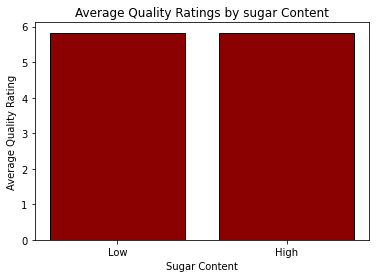

In [34]:
# Creating a bar chart 
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels, color='darkred', edgecolor='black')
plt.title('Average Quality Ratings by sugar Content')
plt.xlabel('Sugar Content')
plt.ylabel('Average Quality Rating');

In [35]:
#Question: What level of acidity receives the highest average rating?
#Answer: Wines with 'Low' level of acidity recieve highest ratings

In [36]:
# Using groupby to get the mean quality for each acidity level
acidity = wine_df.groupby(['acidity_levels'])['quality'].mean()
print(acidity)

acidity_levels
Highest    5.783343
High       5.784540
Medium     5.850832
Low        5.859593
Name: quality, dtype: float64


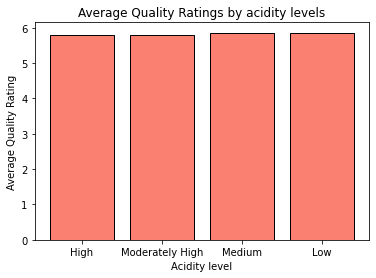

In [37]:
locations = [1, 2, 3, 4]
heights = acidity
labels = ['High', 'Moderately High', 'Medium', 'Low']
plt.bar(locations, heights, tick_label=labels, color='salmon', edgecolor='black')
plt.title('Average Quality Ratings by acidity levels')
plt.xlabel('Acidity level')
plt.ylabel('Average Quality Rating');

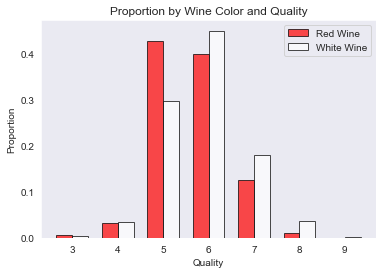

In [38]:
sns.set_style('dark')

# getting counts for each rating and color
color_counts = wine_df.groupby(['color', 'quality']).count()['pH']

# getting total counts for each color
color_totals = wine_df.groupby('color').count()['pH']

# getting proportions by dividing red rating counts by total # of red samples
red_proportions = color_counts['red'] / color_totals['red']

# getting proportions by dividing white rating counts by total # of white samples
white_proportions = color_counts['white'] / color_totals['white']


red_proportions['9'] = 0


ind = np.arange(len(red_proportions))  # the x locations for the groups
width = 0.35       # the width of the bars

# plot bars
red_bars = plt.bar(ind, red_proportions, width, color='r', alpha=.7, label='Red Wine', edgecolor='black')
white_bars = plt.bar(ind + width, white_proportions, width, color='w', alpha=.7, label='White Wine', edgecolor='black')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Quality')
plt.title('Proportion by Wine Color and Quality')
locations = ind + width / 2  # xtick locations
labels = ['3', '4', '5', '6', '7', '8', '9']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();


In [39]:
# Conclusion:
# According to analysis done above from the data obtained from UCI Machine Learning Repository, it has been found that:

# 1. The mean quality of red wine is less than that of white wine
# 2. Wine with 'Low level' of acidity recieves highest average rating from consumers
# 3. Wines with higher alcoholic content generally receive better ratings
# 4. Sweeter wines generally receive higher ratings